In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import datetime
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX 

In [15]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
series = pd.read_csv('shampoo_sales.csv', header=0,parse_dates=True,index_col='Month')

In [16]:
series

,Sales
Month,
1-01,266.0
1-02,145.9
1-03,183.1
1-04,119.3
1-05,180.3
1-06,168.5
1-07,231.8
1-08,224.5
1-09,192.8


In [17]:
series = series.dropna()

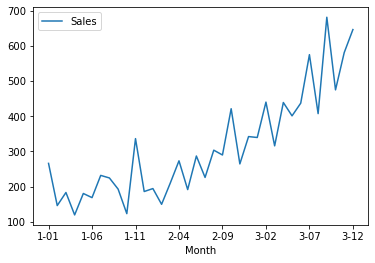

In [18]:
series.plot()
plt.show()

In [19]:
X = series.values

In [20]:
X

array([[266. ],
       [145.9],
       [183.1],
       [119.3],
       [180.3],
       [168.5],
       [231.8],
       [224.5],
       [192.8],
       [122.9],
       [336.5],
       [185.9],
       [194.3],
       [149.5],
       [210.1],
       [273.3],
       [191.4],
       [287. ],
       [226. ],
       [303.6],
       [289.9],
       [421.6],
       [264.5],
       [342.3],
       [339.7],
       [440.4],
       [315.9],
       [439.3],
       [401.3],
       [437.4],
       [575.5],
       [407.6],
       [682. ],
       [475.3],
       [581.3],
       [646.9]])

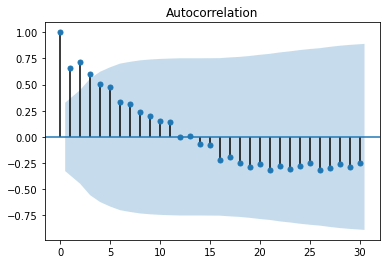

In [29]:
#data is non stationary
acf_plot=plot_acf(series.Sales, lags=30)

In [30]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [32]:
y=series["Sales"].values
result=adfuller(y)

In [34]:
#Level of significance is 5%: 0.05

result=adfuller(y)
print ('ADF Statistic: %f' %result[0])
print ('p-values: %f' %result[1])

ADF Statistic: 3.060142
p-values: 1.000000


In [21]:
size = int(len(X) * 0.60)
print(len(X))
print(size)

36
21


In [22]:
train, test = X[0:size], X[size:len(X)]

In [23]:
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history,order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print(f'Predicted={yhat},Expected ={obs}')
error = mean_squared_error(test,predictions)
print(f"TEST MSE :{error}")

Predicted=[272.96447815],Expected =[421.6]
Predicted=[290.31382476],Expected =[264.5]
Predicted=[349.11769192],Expected =[342.3]
Predicted=[306.5129265],Expected =[339.7]
Predicted=[387.37637046],Expected =[440.4]
Predicted=[348.15419926],Expected =[315.9]
Predicted=[386.30886841],Expected =[439.3]
Predicted=[356.08208287],Expected =[401.3]
Predicted=[446.37949796],Expected =[437.4]
Predicted=[394.73727733],Expected =[575.5]
Predicted=[434.91549753],Expected =[407.6]
Predicted=[507.92342974],Expected =[682.]
Predicted=[435.48284879],Expected =[475.3]
Predicted=[652.74375869],Expected =[581.3]
Predicted=[546.34346791],Expected =[646.9]
TEST MSE :7547.807182087621


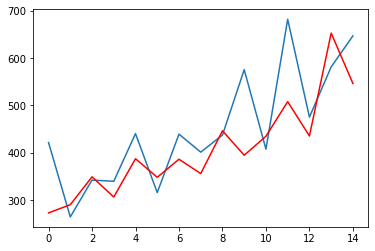

In [25]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()